# Preprocesamiento de bases de datos

## Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import os
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

## Cargamos la base de datos

In [2]:
#Se carga la base de datos con pandas
df = pd.read_csv('readmision.csv')
df = df.drop(columns=['antibioticos','ambulatorio','hospitalizado','urgencia'])

## Explicación del ejercicio

Para este ejercicio se busca determinar cuántos pacientes fueron admitidos en el hospital en la misma fecha en que otro paciente fue dado de alta, pero con la particularidad de que estos nuevos ingresos ocurrieron antes en horas. La variable que deberá construir es la que encontraremos nombrada como 'ingresos_nuevos' en la siguiente tabla.

1) En este ejemplo vemos como en el episodio 34 la fecha de salida es el 14-09-2010 a la 1:34pm y vemos que ese día hubieron 3 ingresos antes de que el paciente del episodio 34 saliera, estos 3 episodios fueron el episodio 45, 48 y 67, los cuales ingresaron el 14-09-2010 entre las 9:17am y 11:43am (ejemplo verde claro)

2) Luego vemos que el paciente 45 salio del hospital el día 20-09-2010 a las 5:23pm y el episodio 89 ingreso en esa misma fecha unas horas antes de la salida del episodio 45, mas exactamente a las 4:54pm por ende al haber un solo ingreso en esa misma fecha de salida, el 'ingresos_nuevos' es 1(Ejemplo verde oscuro) Caso similar ocurrio con el episodio 77 (ejemplo azul).

3) Vemos que el episodio 48 en la columna de 'ingresos_nuevos' tiene 0 ya que ningún paciente ingreso el día 30-09-2010.

4) Por último tenemos el episodio 67 el cual tiene asignado en la columna 'ingresos_nuevos' un 0, sin embargo vemos que el episodio 89 ingreso en la misma fecha (20-09-2010) pero no cuenta como ingreso de nuevo episodio ya que el paciente del episodio salió a la 1:08pm y el nuevo episodio llego unas horas después a las 4:54pm (Ejemplo rojo)




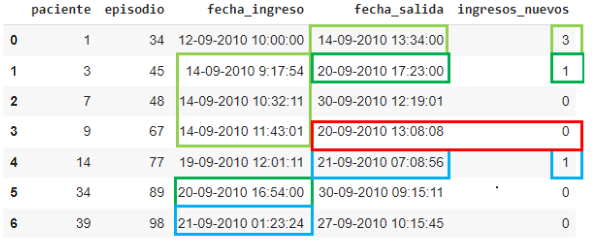

## Base de datos:
-La base de datos solo contará con las columnas paciente, episodio, fecha de ingreso y fecha de salida

In [3]:
df.fecha_ingreso = df.fecha_ingreso.apply(lambda x: x[:len(x)-4])
df.fecha_salida = df.fecha_salida.apply(lambda x: x[:len(x)-4])

In [4]:
df.fecha_ingreso = pd.to_datetime(df.fecha_ingreso, format='%Y-%m-%d %H:%M:%S')
df.fecha_salida = pd.to_datetime(df.fecha_salida, format='%Y-%m-%d %H:%M:%S')

In [5]:
fechas_salidas = df.fecha_salida.dt.date
horas_salidas = df.fecha_salida.dt.hour
minutos_salidas = df.fecha_salida.dt.minute
fechas_ingreso = df.fecha_ingreso.dt.date
horas_ingreso = df.fecha_ingreso.dt.hour
minutos_ingreso = df.fecha_ingreso.dt.minute
salidas = list(zip(fechas_salidas,horas_salidas,minutos_salidas))
ingresos = list(zip(fechas_ingreso,horas_ingreso,minutos_ingreso))
contador = 0
ingresos_nuevos = []

In [6]:
for i in salidas:
  for j in ingresos:
    if i[0] == j[0]:
      if j[1] < i[1]:
        contador += 1
      if j[1] == i[1] and j[2] < i[2]:
        contador += 1
  ingresos_nuevos.append(contador)
  contador = 0

In [7]:
df['ingresos_nuevos'] = ingresos_nuevos

In [8]:
df

,paciente,episodio,fecha_ingreso,fecha_salida,ingresos_nuevos
0,0,3408910,2017-04-02,2017-04-05 11:51:04,101
1,7,3488486,2017-07-07,2017-07-08 05:19:09,71
2,12,3433964,2017-05-11,2017-05-17 10:55:02,95
3,12,3720631,2017-12-04,2017-12-07 11:06:49,91
4,18,3400815,2017-03-22,2017-04-03 12:41:04,82
...,...,...,...,...,...
161027,24843,6574288,2023-03-29,2023-03-31 18:09:33,2
161028,24847,6574303,2023-03-29,2023-03-31 11:40:38,2
161029,24850,6574314,2023-03-29,2023-03-31 09:56:31,2
161030,24856,6574890,2023-03-30,2023-03-31 14:28:55,2


In [9]:
df.to_csv('readmision_sln.csv')

In [10]:
"""
Esta es otra solucion que crei seria mas eficiente computacionalmente segun mi logica, pero no lo fue.

for i in salidas:
  data = df[df.fecha_ingreso.dt.date == i[0]]
  data = data[data.fecha_ingreso.dt.hour < i[1]]
  resta = 0
  if len(data[data.fecha_ingreso.dt.hour == i[1]]) != 0:
    resta = len(data[data.fecha_ingreso.dt.minute > i[2]])
  ingresos_nuevos.append(len(data)-resta)
"""

'\nEsta es otra solucion que crei seria mas eficiente computacionalmente segun mi logica, pero no lo fue.\n\nfor i in salidas:\n  data = df[df.fecha_ingreso.dt.date == i[0]]\n  resta = 0\n  if len(data[data.fecha_ingreso.dt.hour == i[1]]) != 0:\n    resta = len(data[data.fecha_ingreso.dt.minute > i[2]])\n  ingresos_nuevos.append(len(data)-resta)\n'